<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/rice-quality-classification/blob/master/Confusion_Matrix_Uji_Perangkat_Android_VGG-16Net_Dataset_With_Flashlight_Uji_With_Flashlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix Uji Perangkat Android VGG-16Net_Dataset_With_Flashlight_Uji_With_Flashlight

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
labels = ['Ir64_medium', 'Ir64_not_feasible', 'ir64_premium',
          'pandan_wangi_medium', 'pandan_wangi_not_feasible', 'pandan_wangi_premium', 
          'rojo_lele_medium', 'rojo_lele_not_feasible', 'rojo_lele_premium']

In [3]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4,  
          5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
          8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
y_pred = [6, 5, 6, 3, 5, 6, 5, 5, 8, 5,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
          5, 6, 2, 2, 8, 8, 2, 2, 2, 2,
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
          8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


Normalized confusion matrix
[[0.  0.  0.  0.1 0.  0.5 0.3 0.  0.1]
 [0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.  0.1 0.1 0.  0.2]
 [0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


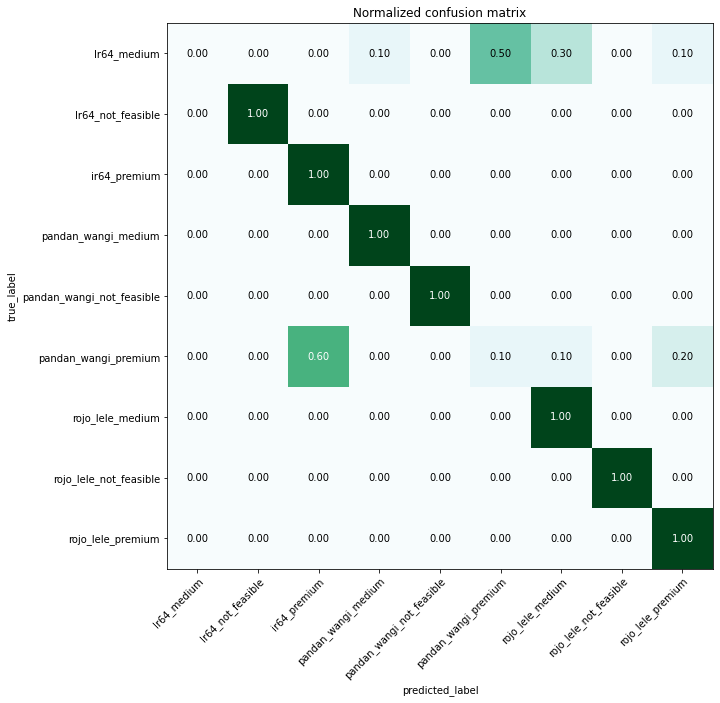

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.BuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='true_label',
           xlabel='predicted_label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

determine accuracy, precision, recall and f1-score

In [5]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       1.00      1.00      1.00        10
           2       0.62      1.00      0.77        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       0.17      0.10      0.12        10
           6       0.71      1.00      0.83        10
           7       1.00      1.00      1.00        10
           8       0.77      1.00      0.87        10

    accuracy                           0.79        90
   macro avg       0.69      0.79      0.73        90
weighted avg       0.69      0.79      0.73        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
